# Parametrische und nicht parametrische Schätzung der Zuverlässigkeit 
## Bachelorarbeit Julia Staiger
### Hochschule Reutlingen


### Um eine Untersuchung der Daten durchzuführen, müssen die Daten folgendes aufweisen:

Eine Lebensdaueranalyse bestimmt die Lebensdauer aufgrund von Einwirkungen 
eines Einflussfaktors mittels statistischer Verfahren. Für diese Untersuchung werden Daten benötigt, die ein Ereignis in Abhängigkeit von der Zeit und weitere Einflussfaktoren aufweisen, z. B. Materialinformation zu einem Bauteil. In diesem Fall ist das einzutretende Ereignis der Ausfall von dem Bauteil und die angegebene Zeit das Zeitintervall, welches bis zum Eintritt von dem Ereignis reicht.

Die Daten werden im Laufe einer Zeitspanne aufgenommen, bei der zuvor ein genauer Start und Endpunkt der Beobachtung definiert wird. Die Variable Lebensdauer gibt somit die Zeit von Anfang der Untersuchung bis zum Auftreten eines Ereignisses an und die Zensur zeigt an, ob das Ereignis aufgetreten ist.

### Folgende Variablen bzw. Spalten müssen vorhanden sein:

- **<font color = 'red' >Lebensdauer</font> (Stunden, Tage, Wochen usw.)** 

- **<font color = 'red' >Beobachtungswert</font> (Zahlenwerte)** Eine Variable die in Abhängigkeit zu der Lebensdauer steht und mithilfe von einem Grenzwert angibt, ob das Ereignis eingetreten ist. (Bsp. ab dem Wert x muss das Werkzeug ausgewechselt werden)
  
  **oder**

- **Eintritt des Ereignisses <font color = 'red' >Zensur</font> (1 und 0)**: Tritt das Ereignis in dem Zeitintervall auf, so handelt es sich um nicht zensierte Daten. Hierbei wird eine 1 als Zensur aufgenommen. Tritt das Ereignis jedoch nicht in dem Zeitintervall auf, so handelt es sich um eine zensierte Daten und die Zensur entspricht einer Null.


### Import der Packages
Zuerst werden alle benötigten Packages vorab importiert 

In [54]:
import pandas as pd                         #Datenanalyse
import numpy as np                          #Wissenschaftliches Rechnen und numerische Berechnungen
import matplotlib.pyplot as plt             #ermöglicht graphische Dastellung
import matplotlib.patches as mpatches       #Für schöne Legenden in Grafiken
from scipy import stats                     #Wahrscheinlichekeitsverteilungen
import seaborn as sns                       #Statistische Darstellung
from lifelines import WeibullFitter         #für die Weibull-Verteilung
import sys                                  #Verzeichnis zu anderen Python-Programmen
import pylab
import scipy.stats as stats

## Vorbereitung der Daten

- Der Datei-Typ muss einer **csv-Datei** entsprechen. 
- Die Spalte mit den Angaben zu der Lebensdauer muss in der csv-Datei in **"Lebensdauer"** umbenannt werden.
- Die Spalte mit den Angaben zu dem Eintritt des Ereignisses (zensiert oder nicht zensiert) muss in **"Zensur"** umbenannt werden.
 **Falls die Variable noch nicht existert, kann diese in den weiteren Schritten mithilfe eines Grenzwertes erstellt werden.**

## Einlesen der csv-Datei

Die csv-Datei muss in Binder hochgeladen werden. Anschließend werden die Daten eingelesen, indem der Datei-Name mit der Endung .csv angegeben wird.
df = pd.read_csv("Name_von_der_Datei.csv")

Bsp. df = pd.read_csv("smartphone.csv")
Die Daten werden in Form einer Tabelle angeordnet.

Die Tabelle wird mit **df**(Dataframe) abgekürzt.

In [55]:
#für Binder
Datei_Name = input('Geben Sie den Datei-Name mit der Endung .csv ein')
df = pd.read_csv(Datei_Name)
Einlesen der Daten mit folgenden Pfad

**Führen sie folgenden Befehl aus um die Variable Zensur mit einem Grenzwert zu erstellen:**
Zudem erscheint eine Tabelle in der überprüft werden kann, ob die Erstellung der Variablen erfolgreich war.
Mit dem Befehl "df.head()" werden die **ersten 5 Zeilen der Tabelle** anzeigt

In [ ]:
#Funktion aus der Datei importieren
from Zensur_erstellen import Zensur_erstellen_def
#Funktion ausführen
Zensur_erstellen_def(df)
df.head()

### Überprüfung, ob die Variablen Lebensdauer und Zensur vorhanden sind: 


In [ ]:
#Wenn die Variable Lebensdauer vorhanden ist, dann wird folgender Text ausgegeben
if {'Lebensdauer'}.issubset(df.columns):
    print ('Die Variable Lebensdauer ist verfügbar')
else:
    print('Fehler: Die Variable Lebensdauer ist nicht verfügbar')
#Wenn die Variable Zensur vorhanden ist, dann wird folgender Text ausgegeben
if {'Zensur'}.issubset(df.columns):
    print ('Die Variable Zensur ist verfügbar')
else:
    print('Fehler: Die Variable Zensur ist nicht verfügbar')

Mögliche Lösungen bei Fehlermeldungen:
- Ist die Variabel Lebensdauer nicht vorhanden, dann sollte überprüft werden, ob diese in der csv-Datei richtig umbenannt wurde. 
- Ist die Variable Zensur nicht vorhanden, dann kann die obere Spalte zur Erstellung der Zensur nochmal ausgeführt werden.

## Überarbeitung der Dataframe

Wenn einzelne Daten in der Tabelle fehlen erscheint das Wort "NaN".

Mit der Ausführung der nächsten Spalte werden automatisch diese NaN-Werte ersetzt. Nur Variablen mit Zahlenwerten können ausgetauscht werden. Hierfür wird der Mittelwert der gesamten Spalte ermittelt. Dieser Mittelwert ersetzt die NaN-Werte. 
Bei Daten, die eine Zeichenkette, ein sogenannter "String" enthalten, können nicht ersetzt werden, da kein Mittelwert gebildet werden kann. 

In [ ]:
#Funktion aus der Datei importieren
from Fehlende_Daten import Fehlende_Daten_def
#Funktion ausführen
Fehlende_Daten_def(df)

## Kaplan-Meier Schätzer
Eine Kaplan-Meier-Schätzung wird in der nächsten Zelle durchgeführt. Die Kaplan-Meier Schätzung ist ein nichtparametrisches Verfahren. Bei nichtparametrischen Verfahren ist die jeweilige Verteilung der Daten nicht entscheidend.
Die Kaplan-Meier-Schätzung schätzt die Wahrscheinlichkeit, dass ein bestimmtes Ereignis innerhalb eines Zeitintervalls nicht eintritt. Somit gibt diese die Wahrscheinlichkeit für ein Überleben an. 


Grafik:
Die Überlebenswahrscheinlichkeit ist zu Beginn 100%.
Das Konfidenzintervall ist schraffiert eingezeichnet. Dieses steigt mit der Abnahme der Überlebenswahrscheinlichkeit, da auch die Genauigkeit der Schätzung abnimmt.

Kaplan-Meier-Kurve:

In [ ]:
#Funktion aus der Datei importieren
from Kaplan_Meier import Kaplan_Meier_def
#Funktion ausführen
Kaplan_Meier_def(df)

Schätzung der Überlebenswahrscheinlichkeit zu einem bestimmten Zeitpunkt:

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations =  df["Lebensdauer"], event_observed = df["Zensur"],label = 'Kaplan-Meier-Schätzung')
Schätzung = input('Geben Sie den Zeitpunkt als Zahl an: ')
Wert_=kmf.predict(int(Schätzung))
print(round(Wert_,3))


Die Schätzung der Überlebenswahrscheinlichkeiten:

In [ ]:
kmf.fit(durations =  df["Lebensdauer"], event_observed = df["Zensur"],label = 'Kaplan-Meier-Schätzung')
kmf.survival_function_

Werte für die Konfidenzintervalle:

In [ ]:
kmf.fit(durations =  df["Lebensdauer"], event_observed = df["Zensur"],label = 'Kaplan-Meier')
kmf.confidence_interval_

**Kaplan-Meier-Schätzung ohne Konfidenzitervalle:**

In [ ]:
#Funktion aus der Datei importieren
from Kaplan_Meier import Kaplan_def
#Funktion ausführen
Kaplan_def(df)

## Nelson-Aalen-Schätzer
Eine Nelson-Aalen-Schätzung wird in der nächsten Zelle durchgeführt. Die Nelson-Aalen-Schätzung ist ein nichtparametrisches Verfahren.
Diese gibt die Rate an, dass ein bestimmtes Ereignis zum Zeitpunkt t eintritt.

Nelson-Aalen-Kurve:

In [ ]:
#Funktion aus der Datei importieren
from Nelson_Aalen import Nelson_Aalen_def
#Funktion ausführen
Nelson_Aalen_def(df)

Schätzung der Ausfallrate zu einem bestimmten Zeitpunkt:

In [ ]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(df["Lebensdauer"], event_observed = df["Zensur"],label = 'Nelson-Aalen-Schätzung')
Schätzung = input('Geben Sie den Zeitpunkt als Zahl an: ')
Wert_=naf.predict(int(Schätzung))
print(round(Wert_,3))

Die Schätzung der Ausfallrate:

In [ ]:
naf.fit(df["Lebensdauer"], event_observed = df["Zensur"],label = 'Nelson-Aalen-Schätzung')
naf.cumulative_hazard_

Werte für die Konfidenzintervalle:

In [ ]:
naf.fit(df["Lebensdauer"], event_observed = df["Zensur"],label = 'Nelson-Aalen-Schätzung')
naf.confidence_interval_

## Vergleich: Kaplan-Meier und Nelson-Aalen Schätzung
Beide Verteilungen werden in eine Graphik dargestellt.


In [ ]:
#Funktion aus der Datei importieren
from Nelson_Aalen import Beide_Verteilungen_def
#Funktion ausführen
Beide_Verteilungen_def(df)

## Weibul-Verteilung
Die Weibull-Verteilung wird durch 3 Parametern beschrieben: Der Form, Skalen und Schwellenparameter. Ist der Schwellenparameter null, so wird die Weibull-Verteilung als zweiparametrige Verteilung behandelt. Diese Verteilung ist nur für positive Werte definiert. 
- Formparameter: Beschreibt die Verteilung der Daten. Ein geringer Wert, wie z. B. 1 entspricht einer rechtsschiefen Kurve, der Wert 3 entspricht annähernd einer Normalverteilung und hohe Werte, wie z. B. 10 einer linksschiefen Kurve. 
- Skalenparameter: Definiert die Position der Weibull-Kurve relativ zum Schwellenwert. Ähnlich wie der Mittelwert bei der Normalverteilung.
- Schwellenwert: Verschiebung der Verteilung um den Nullpunkt. Entspricht der Schwellenwert einem negativen Wert, dann wird die Verteilung in den negativen Bereich verschoben. Ist der Wert positiv, dann wird die Verteilung in den positiven Bereich verschoben.


- $\lambda $: Skalenparameter
- $\rho$: Formparameter

Bei der Lebensdauer darf der Wert null nicht vorkommen. Kommen null-Werte vor, so wird ein minimaler Wert addiert.

Der Wert Null kommt vor.
Um die Weibull-Verteilung durchzuführen, wird zu den Werten der Lebensdauer 1E-15 hinzuaddiert.
Rho entspricht: 2.15 
Lamda entspricht: 4.68


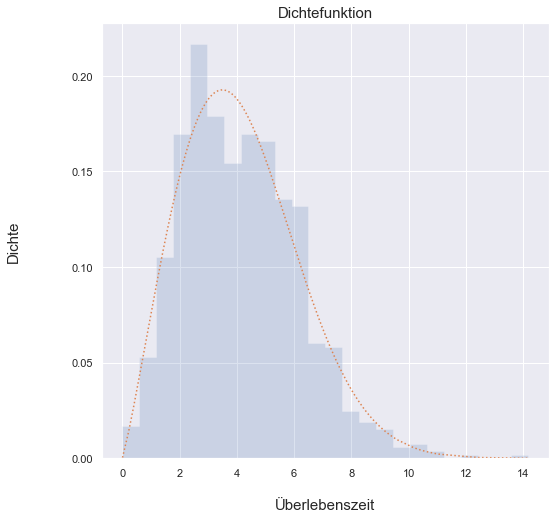

In [56]:
#Funktion aus der Datei importieren
from Weibull import Weibull_def
#Funktion ausführen
Weibull_def(df)

## Lognormal-Verteilung



Die positive Zufallsgröße X habe eine Lognormalverteilung mit Parametern ${\sigma}^2$ und µ, falls der ln(X) die Normalverteilung  ${\sigma}^2$ und µ besitzt. Somit kann die Verteilung nur verwendet werden, wenn der Logarithmus der Zufallsvariable normalverteilt ist. Das Modell eignet sich vorallem bei multiplikativ wirkenden Zufallsprozessen.



Sigma entspricht: 0.60 
µ entspricht: 1.28


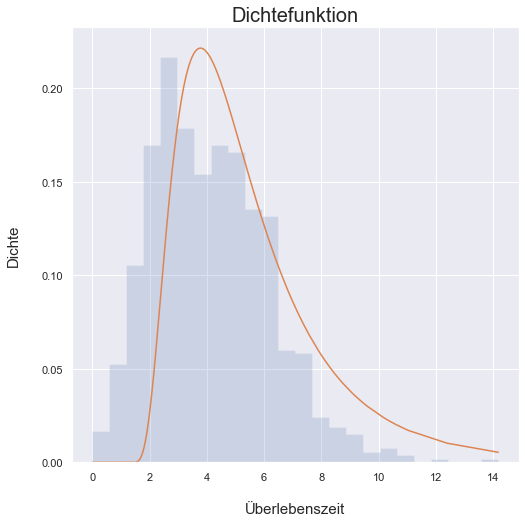

In [57]:
#Funktion aus der Datei importieren
from Lognormal import Lognormal_def
#Funktion ausführen
Lognormal_def(df)

## Cox-Regression

Die Cox-Regression ist ein Verfahren, um die Auswirkung der Einflussvariablen auf das einzutretende Ereignis zu schätzen. Hierbei wird untersucht, ob ein signifikanter Unterschied zwischen den Einflussfaktoren besteht. Das Proportional-Hazard-Modell von Cox weist die Annahme proportionaler Risikofunktionen auf. Es zeigt die Auswirkung der einzelnen Prädikatoren auf die Form der Überlebenskurve. Des Weiteren wird der HR-Wert, der sogenannte Hazard-Ratio-Wert, bestimmt. Dieser beschreibt die momentane Sterberate für eine Variable. Das Hazard-Ratio, auch das sogenannte Risikoverhältnis wird durch zwei Beobachtungen mit deren Einflussgrößen berechnet.

Hazard-Ratio: HR-Wert (in der unteren Tabelle exp(coef))
 
- Entspricht der Wert 1, dann hat die Variable keinen Einfluss. 
- Einen HR-Wert kleiner 1 Reduzierung das Ereignisrisiko. Somit steigt die Überlebenswahrscheinlichkeit.
- Einen HR-Wert größer 1 Steigert das Ereignisrisiko. Dadurch sinkt die Überlebenswahrscheinlichkeit.

Um die Cox-Regression durchzuführen, muss zuerst die Anzahl der Variablen, sowie deren Bennenung eingegeben werden.(Groß- und Kleinschreibung beachten)



In [ ]:
from lifelines import CoxPHFitter           #für Cox-Regression
#Eine Tabelle wird mit den Variablen Lebensdauer und Zensur erstellt
Variablen=['Lebensdauer','Zensur']
Tabelle=df.loc[:,Variablen]
#Abfrage wie viele Variablen untersucht werden sollen
C_R = input('Wie viele Variableln wollen Sie testen? (Zahl eingeben)')
#Schleife die alle eingegebenen Variablen in die Tabelle hinzufügt
for x in range(0, int(C_R)):
    a = input('Bitte geben Sie die Variable ein:  ')
    Tabelle.insert(x, a ,df[a],True)
    print('Sie haben folgende Variablen eingegeben:'+ a)
    if x == C_R:
       break 
cph = CoxPHFitter()
#durations = Lebensdauer; event_observed = Zensur
cph. fit(Tabelle, duration_col = 'Lebensdauer', event_col = 'Zensur')
#Grafik plotten
plt.figure()
sns.set(rc={'figure.figsize':(5,5)})
cph.plot()
plt.show()
#Tabelle mit den ausgewerteten Werten
cph.summary